In [315]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import utilities as utils

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 12
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['text.usetex'] = True

W = np.array([[1.5,.5]])
x = np.array([1])

def z2_f(z1,W,x):
    return (x[0] - W[0,0]*z1)/W[0,1]

def P(z):
    return -np.sum(np.abs(z))/2 - np.log(2)

def e_x(th,rot,m,rx,ry):
    xx = rx *(np.cos(th) + np.sin(th))
    yy =  ry * (-np.sin(th) + np.cos(th))
    return m[0] + xx *np.cos(rot) + yy * np.sin(rot)
def e_y(th,rot,m,rx,ry):
    xx = rx *(np.cos(th) + np.sin(th))
    yy =  ry * (-np.sin(th) + np.cos(th))
    return m[1] - xx *np.sin(rot) + yy * np.cos(rot)
    

In [ ]:
def g(x,m,s):
    xx = x-m
    return np.exp(-np.dot(xx,np.dot(np.linalg.inv(s),xx)))/np.sqrt((2*np.pi*np.linalg.det(s))**2)

zp = np.linspace(-2,2,100)

plt.clf()
plt.figure(figsize = (3,3))

rr = np.linspace(0,2*np.pi,100)

contours = np.linspace(-3,0,20)

plt.contour(zp,zp,np.array([[P(np.array([z1,z2])) for z2 in zp ]for z1 in zp]),colors = [(.75,.75,.75,1) for c in contours],levels = contours,linestyles="solid")

rot1 = 0
m1 = [1,.2]
x1 = .4
y1 = .7

rot2 = -np.pi/4
m2 = [.65,.55]
x2 = .5
y2 = 1.1

plt.plot([e_x(r,rot1,m1,x1,y1) for r in rr],[e_y(r,rot1,m1,x1,y1)for r in rr],linewidth = 2,label = "independent")
plt.plot([e_x(r,rot2,m2,x2,y2) for r in rr],[e_y(r,rot2,m2,x2,y2)for r in rr],linewidth = 2,label = "correlated")

m2 = np.array([0,1.25])
m1 = np.array([1.0,.25])

s2 = np.array([[.1,0],[0,.1]])
s1 = 1.25*np.array([[.15,-.1],[-.1,.15]])

xx = np.array([[np.log(.5*g(np.array([z1,z2]),m1,s1) + .5*g(np.array([z1,z2]),m2,s2)) for z2 in zp ]for z1 in zp])
plt.plot([-10,-11],[-100,-100],color = (0,0,0),label = "exact")

plt.contour(zp,zp,xx,colors = [(0,0,0,1)],levels = [-3],linestyles="solid")


plt.legend(loc = (.05,.05))
plt.plot([0,0],[-2,2],"k--",linewidth=1)
plt.plot([-2,2],[0,0],"k--",linewidth=1)
plt.xlabel("z_{1}")
plt.ylabel("z_{2}")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.savefig("./correlatedposterior.pdf",bbox_inches = "tight")
plt.show()

In [364]:
import numpy as np
import matplotlib.pyplot as plt

f = ["saved_model_" + str(k) for k in range(0,600000,50000)]# + ["saved_model_final"]

A = np.array([np.loadtxt("model_output/exp_0_13/{}_weights.csv".format(k)) for k in f])
print(A.shape)
B = A

A = np.reshape(A,[len(f),A.shape[1],12,12])
print(B.shape)

CC = np.dot(B[-1].transpose(),B[-1])

ci = np.linalg.inv(CC)

MAX = np.max(np.abs(A[-1]))


(12, 288, 144)
(12, 288, 144)


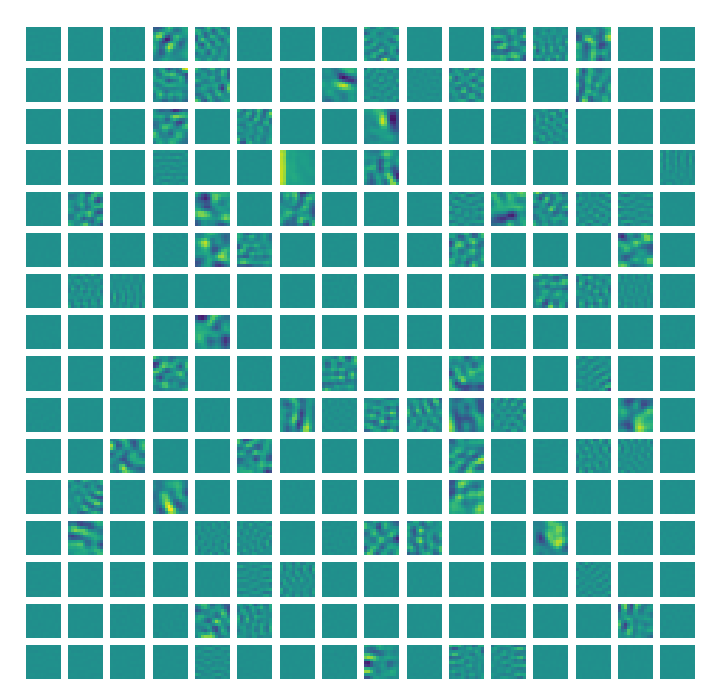

In [365]:

nn = int(np.sqrt(A.shape[1]))
fig, ax = plt.subplots(nn,nn,figsize=(12,12))


for i in range(nn):
    for j in range(nn):
        ax[i,j].matshow(A[-1,i + j*nn],vmin = -MAX,vmax = MAX)
        ax[i,j].axis('off')
    
plt.savefig("./cauchy_2_0_RF_test.pdf")
plt.show()

(12, 288, 12, 12)
(11, 288)


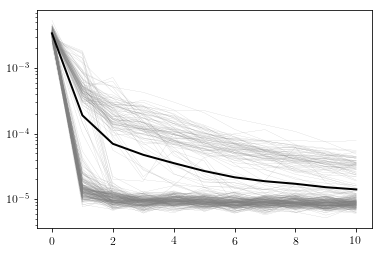

In [366]:
print(A.shape)

da = np.mean((A[:-1] - A[1:])**2,axis = (2,3))
print(da.shape)
plt.plot(da,linewidth = .1,color = (.5,.5,.5,1))
plt.plot(np.mean(da,1),linewidth = 2,color = (0,0,0,1))
plt.yscale("log")
plt.show()

In [27]:
XX = np.array([[[np.std(np.reshape(bb,[-1])) for bb in f] for f in z] for z in [A]])

print(XX.shape)

(1, 3, 144)


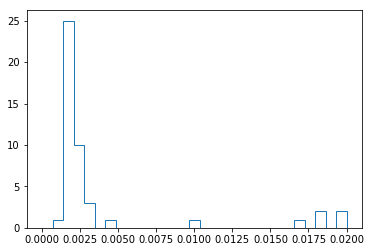

In [28]:
for k in XX:
    plt.hist(k[-1],np.linspace(0,.02,30),histtype = "step")
plt.show()

In [141]:
[np.mean(k[-1]) for k in XX]

[0.039943610757723493, 0.040142120064239853, 0.040014631345309977]

In [142]:
[len([g for g in k[-1] if g > .002]) for k in XX]

[144, 144, 144]

In [66]:
f = np.linspace(0,1,100)

fc = 1./2.

a = np.exp(-(f/fc)**7)

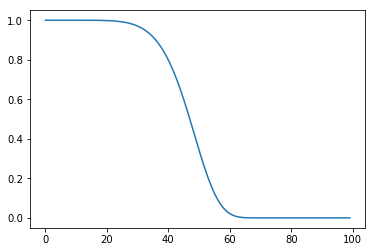

In [67]:
plt.plot(a)
plt.show()

In [211]:
import utilities as utils
import SVAE_analysis as SVan
from run_sparse_vae import prepare_network as prep
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

directory = "./model_output/exp_0_6/"
tf.reset_default_graph()
params = utils.fetch_file(directory + "model_params")
netparams = prep(params)
print(netparams.keys())
CP = SVan.read_ckpt_file(directory + "saved_params/checkpoint")

init = tf.global_variables_initializer()
print(CP)

getting data
constructing network
dict_keys(['variance', 'diagonal_var', 'recon_err', 'PCA', 'testdat', 'images', 'mean', 'vardat', 'data', 'factor_var', 'latents', 'noise', 'n_lat', 'loss_exp', 'diag_cor', 'reconstruction', 'diag_trans', 'weights'])
['saved_model_10000', 'saved_model_0', 'saved_model_10000']


/home/gbarello/tf17/lib/python3.5/site-packages/ipykernel_launcher.py:13: ResourceWarning: unclosed file <_io.TextIOWrapper name='./model_output/exp_0_6/saved_params/checkpoint' mode='r' encoding='UTF-8'>
  del sys.path[0]


<Figure size 432x288 with 0 Axes>

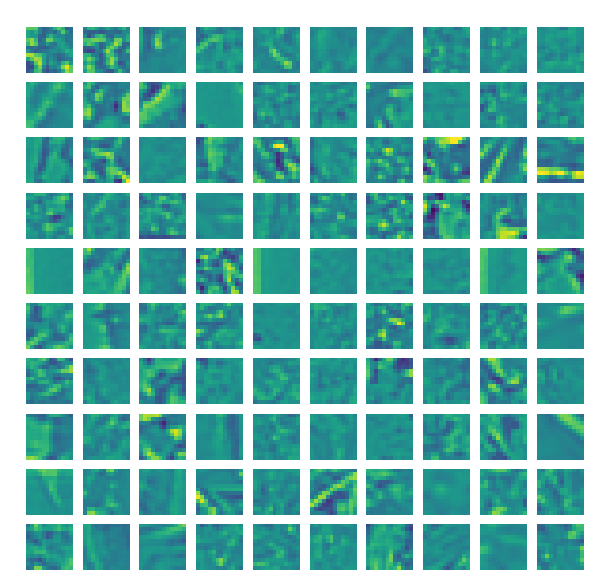

In [279]:
import numpy as np
import matplotlib.pyplot as plt

#drs = np.reshape(netparams["PCA"].inverse_transform(netparams["data"]),[-1,12,12])
drs = np.reshape(netparams["data"],[-1,12,12])
#dvs = np.reshape(netparams["PCA"].inverse_transform(netparams["data"]),[-1,144])
dvs = np.reshape(netparams["data"],[-1,144])
plt.clf()

fig, ax = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        ax[i,j].matshow(drs[i + j*10],vmin = -5,vmax = 5)
        ax[i,j].axis('off')
        
plt.show()

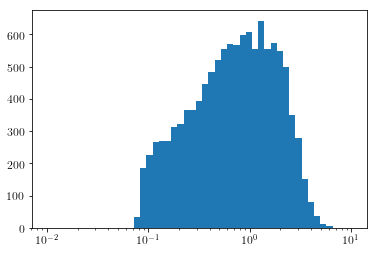

(144, 144)


In [225]:
var = np.std(dvs,axis = 1)**2
plt.hist(var,np.logspace(-2,1,50))
plt.xscale("log")
plt.show()

CC = np.cov(dvs.T)
print(CC.shape)

50.70481912085345


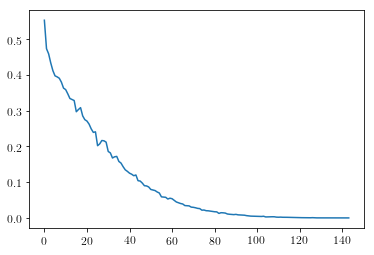

[5.52978054e-01 4.73444625e-01 4.58952506e-01 4.33378428e-01
 4.11928665e-01 3.97478078e-01 3.90731976e-01 3.94595433e-01
 3.79727076e-01 3.63127573e-01 3.58965099e-01 3.47101430e-01
 3.34085950e-01 3.31102139e-01 3.28390288e-01 3.08510172e-01
 3.03187188e-01 2.97060348e-01 2.85418237e-01 2.49093838e-01
 2.62441895e-01 2.74901136e-01 2.70966949e-01 2.40818033e-01
 2.39254853e-01 2.16523321e-01 2.15719329e-01 2.12026934e-01
 2.07155987e-01 2.01978674e-01 1.85871921e-01 1.81865069e-01
 1.53386133e-01 1.57984696e-01 1.67640242e-01 1.72071472e-01
 1.70974033e-01 1.43263776e-01 1.34566649e-01 1.30228374e-01
 1.25129828e-01 1.22320968e-01 1.20124410e-01 1.18043318e-01
 1.04121786e-01 1.03151099e-01 9.75296826e-02 8.94746428e-02
 9.00966101e-02 8.66072767e-02 7.96475844e-02 7.80349971e-02
 7.65418480e-02 7.25512254e-02 6.96858978e-02 5.77076936e-02
 5.84549109e-02 5.89060577e-02 4.93474757e-02 5.51245813e-02
 5.28445438e-02 5.37124588e-02 4.45980222e-02 4.23372816e-02
 4.02710085e-02 3.896396

In [302]:
ee,ev = np.linalg.eig(CC)

es = ee/np.sum(ee)
print(1./np.sum(es**2))
plt.plot(ee)
plt.show()
CV = np.cov(netparams["data"].T)
print(np.linalg.eig(CV)[0])

In [3]:
sess = tf.Session()
sess.run(init)
saver = tf.train.Saver()

saver.restore(sess,directory + "saved_params/" + CP[-1])

TD = netparams["data"]
o = []
for t in range(1):
    m,v,d,c = sess.run([netparams["mean"],netparams["variance"],netparams["diagonal_var"],netparams["factor_var"]],{netparams["images"]:TD[t*params["n_batch"]:(t+1)*params["n_batch"]]})
    #o.append([netparams["PCA"].inverse_transform(TD[t*params["n_batch"]:(t+1)*params["n_batch"]]),np.copy(m),np.copy(v),np.copy(d),np.copy(c)])
    o.append([TD[t*params["n_batch"]:(t+1)*params["n_batch"]],np.copy(m),np.copy(v),np.copy(d),np.copy(c)])
ww = sess.run(netparams["weights"]).transpose()

INFO:tensorflow:Restoring parameters from ./model_output/exp_2_4/saved_params/saved_model_final


In [ ]:
sess.close()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(ww.shape)
W = np.reshape(netparams["PCA"].inverse_transform(ww),[-1,12,12])
#W = np.reshape(ww,[-1,12,12])

fig, ax = plt.subplots(10,10,figsize=(10,10))

for i in range(10):
    for j in range(10):
        ax[i,j].matshow(W[i + j*10])
        ax[i,j].axis('off')
        
plt.show()

(169, 113)


In [ ]:
plt.clf()
fig,ax = plt.subplots(len(o[0]),3,figsize = (3,len(o[0])))

I = []

for k in range(len(o[0])):
    #I need to find the index of the largest covariance
    
    u = np.abs(np.triu(o[0][2][k],1))
#    u = np.abs(np.diag(o[0][1][k]))
    
    um = np.max(u,axis = 1)
    i1 = np.argmax(um)
    i2 = np.argmax(u[i1])
    
    ax[k,0].matshow(W[i1])
    ax[k,1].matshow(W[i2])
#    ax[k,2].matshow(np.reshape(o[0][0][k],[12,12]))

    ax[k,2].matshow(np.reshape(netparams["PCA"].inverse_transform([o[0][0][k]])[0],[12,12]))
    ax[k,0].axis('off')
    ax[k,1].axis('off')
    ax[k,2].axis('off')
    ax[k,2].text(-10,0,"{}".format(u[i1][i2]))
    I.append([i1,i2])
plt.show()

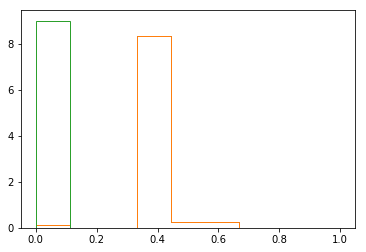

In [32]:
def flat(x):
    return np.reshape(x,[-1])

plt.hist(flat(np.diag(o[0][2][0])),np.linspace(0,1,10),histtype="step",normed=True)
plt.hist(flat(np.diag(o[0][3][0])),np.linspace(0,1,10),histtype="step",normed=True)
plt.hist(flat(o[0][4][0]),np.linspace(0,1,10),histtype="step",normed=True)
plt.show()

In [33]:
flat(o[0][4][0])

array([ 0.00019775,  0.00076138,  0.00037706, ..., -0.00112498,
        0.00142505,  0.00500743], dtype=float32)

In [ ]:
W.shape

/home/gbarello/tf17/lib/python3.5/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='./model_output/exp_0_8/logfile.csv' mode='r' encoding='UTF-8'>
  """


/home/gbarello/tf17/lib/python3.5/site-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.TextIOWrapper name='./model_output/exp_0_13/logfile.csv' mode='r' encoding='UTF-8'>
  """


Minimum ELBO: 191.31199951171874
211300.0 206000.0 214900.0


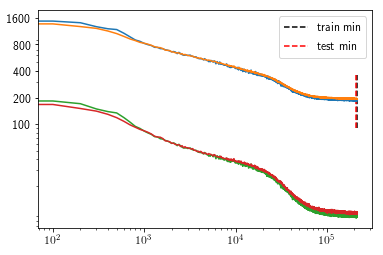

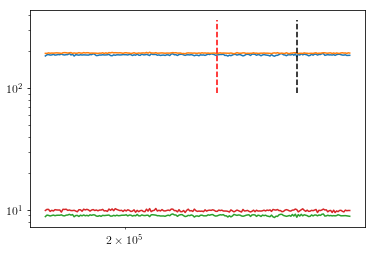

In [351]:
import numpy as np
import my_modules.utilities as util
import matplotlib.pyplot as plt

log = np.array(util.read_csv("./model_output/exp_0_13/logfile.csv",header = True))

a = np.array([[float(x) for x in l] for l in log[1:]])
print("Minimum ELBO: {}".format(min(a[:,3])))

l1 = a[np.argmin(a[:,1]),0]
l2 = a[np.argmin(a[:,3]),0]

print(l1,l2,a[-1,0])


MIN = a[0,3]
tmp = [MIN]
for x in a[1:]:
    if x[3] < MIN:
        MIN = x[3]
    tmp.append(MIN)

low = np.min(a[:,[1,3]])
hig = np.max(a[:,[1,3]])

plt.plot([l1,l1],[low/2,low*2],"k--",label = "train min")
plt.plot([l2,l2],[low/2,low*2],"r--",label = "test min")

plt.plot(a[:,0],a[:,1])
plt.plot(a[:,0],a[:,3])

plt.plot(a[:,0],a[:,2])
plt.plot(a[:,0],a[:,4])

plt.yticks([10,20,40,80,160],[10,20,40,80,160])
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.yticks([100,200,400,800,1600],[100,200,400,800,1600])

plt.show()

dd = 200

plt.plot(a[-dd:,0],a[-dd:,1])
plt.plot(a[-dd:,0],a[-dd:,3])

plt.plot(a[-dd:,0],a[-dd:,2])
plt.plot(a[-dd:,0],a[-dd:,4])

plt.plot([l1,l1],[low/2,low*2],"k--",label = "train min")
plt.plot([l2,l2],[low/2,low*2],"r--",label = "test min")
plt.xscale("log")
plt.yscale("log")

plt.show()

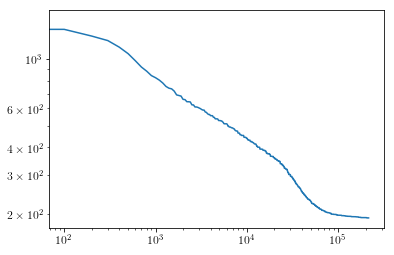

In [352]:

    
plt.plot(a[:,0],tmp)
plt.xscale("log")
plt.yscale("log")

plt.show()

In [269]:
from scipy.io import loadmat

A = loadmat("./datasets/IMAGES.mat")["IMAGES"]
B = loadmat("./datasets/IMAGES_RAW.mat")["IMAGESr"]
print(A.shape)

(512, 512, 10)


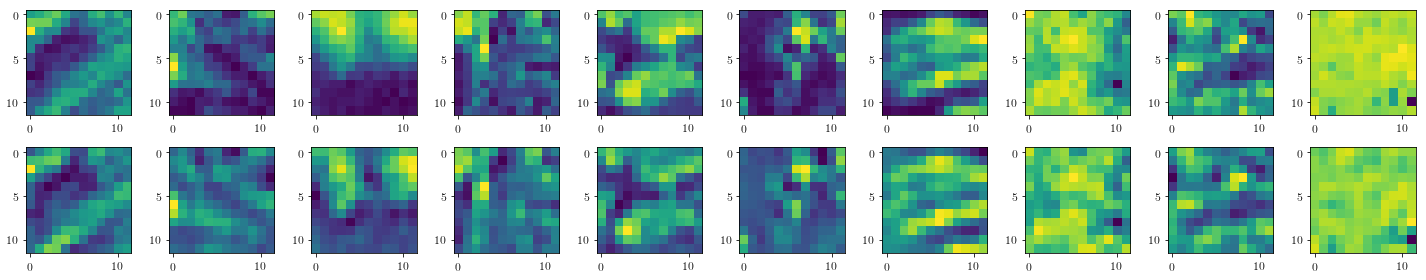

In [270]:
fig,ax = plt.subplots(2,A.shape[2],figsize = (2*A.shape[2],4))
n = 300
m = 100
for k in range(A.shape[2]):
    ax[0][k].imshow(B[n:n+12,m:m+12,k])
    ax[1][k].imshow(A[n:n+12,m:m+12,k])
plt.tight_layout()
plt.show()


In [293]:
dd = np.array(np.split(A.transpose([2,0,1]),range(0,len(A),12),axis = 1)[1:-1])
dd = np.array(np.split(dd,range(0,len(A),12),axis = -1)[1:-1])
dd = np.reshape(dd,[-1,12,12])
dv = np.reshape(dd,[-1,144])
print(dd.shape)

C = np.corrcoef(dv.T)
ee,ev = np.linalg.eig(C)

ei = ee / np.sum(ee)
print(ei)
print(1./np.sum(1./ei**2))

(17640, 12, 12)
[4.11318635e-02 3.61327374e-02 3.51265739e-02 3.13056752e-02
 3.02532833e-02 2.92542705e-02 2.83982185e-02 2.80265872e-02
 2.66658065e-02 2.61447679e-02 2.57989580e-02 2.52521252e-02
 2.40396563e-02 2.37120588e-02 2.30469069e-02 2.21600832e-02
 2.09972895e-02 2.04204081e-02 1.85763892e-02 1.89396234e-02
 1.94937374e-02 2.00997582e-02 1.75383506e-02 1.66246022e-02
 1.75904133e-02 1.53826307e-02 1.48860999e-02 1.50671795e-02
 1.45175395e-02 1.40626688e-02 1.36154820e-02 1.26231808e-02
 1.06716288e-02 1.22282697e-02 1.19643357e-02 1.16646293e-02
 1.14209241e-02 1.02628012e-02 9.50362459e-03 9.13169544e-03
 8.93472548e-03 8.73625978e-03 8.40195550e-03 8.03836139e-03
 7.71090834e-03 7.47205998e-03 6.83521510e-03 6.41620222e-03
 6.51641321e-03 6.18354580e-03 5.86462313e-03 5.55107408e-03
 5.18468165e-03 5.29193695e-03 4.70549674e-03 4.48789787e-03
 4.11974721e-03 3.57722138e-03 4.00183323e-03 3.92271269e-03
 3.86860523e-03 3.74136271e-03 3.41506314e-03 2.87646725e-03
 2.89909

<Figure size 432x288 with 0 Axes>

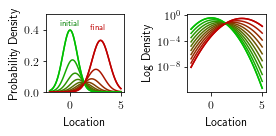

In [349]:
def f1(x,m,s):
    return np.exp(-((x-m)/s)**2)/np.sqrt(2*np.pi*s*s)

def mix(x,b,m1,m2,s1,s2):
    return (f1(x,m1,s1)**(1-b))*(f1(x,m2,s2)**(b))
plt.clf()
x = np.linspace(-2,5,100)

mm = 3
ss = 1.2
beta = np.linspace(0,1,10)
color = [(.75*x,.75*(1-x),0,1) for x in beta]

fig,sub = plt.subplots(1,2,figsize = (4,2))

for b in range(len(beta)):
    sub[0].plot(x,mix(x,beta[b],0,mm,1,ss),color = color[b])
    
sub[0].plot(x,f1(x,0,1),color = color[0])
sub[0].plot(x,f1(x,mm,ss),color = color[-1])
sub[0].set_xlabel("Location")
sub[0].set_ylabel("Probability Density")
sub[0].text(-1,.43,"initial",fontsize = 8,color = (0,.5,0,1))
sub[0].text(2,.4,"final",fontsize = 8,color = (.75,0,0,1))
sub[0].set_ylim([0,.5])

for b in range(len(beta)):
    sub[1].plot(x,mix(x,beta[b],0,mm,1,ss),color = color[b])
    
sub[1].plot(x,f1(x,0,1),color = color[0])
sub[1].plot(x,f1(x,mm,ss),color = color[-1])
sub[1].set_yscale("log")
sub[1].set_xlabel("Location")
sub[1].set_ylabel("Log Density")
plt.tight_layout()
plt.savefig("./AIS_example_figure.pdf",bbox_inches = "tight")
plt.show()

(60, 80, 288)
(60, 288, 288)


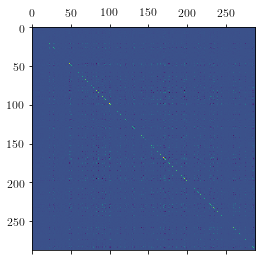

In [360]:
A = np.array([utils.fetch_file("./model_output/exp_0_13/training_means_{}.pkl".format(k)) for k in range(0,600000,10000)])
print(A.shape)
pers = np.linspace(0,100,101)

B = np.array([[np.percentile(a,p) for p in pers] for a in np.std(A,axis = 1)])

C = np.array([[np.percentile(a,p) for p in pers] for a in np.mean(A,axis = 1)])

ss = np.std(A,axis = 1)

mm = np.mean(A,axis = 1)

D = np.array([np.dot(a.T,a) for a in A])
print(D.shape)

plt.matshow(D[-1])
plt.show()

(60, 80, 288)


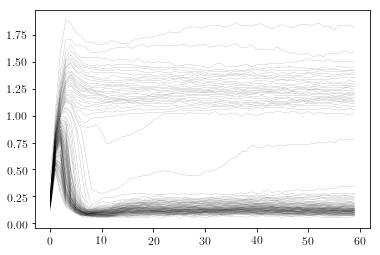

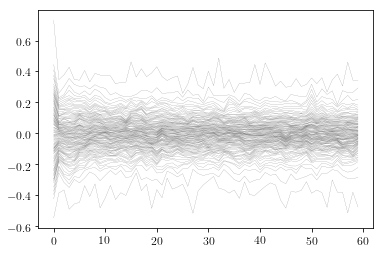

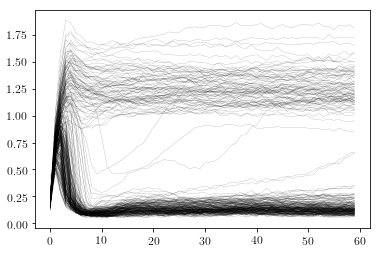

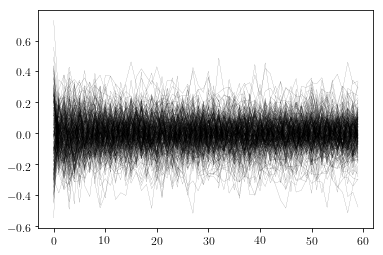

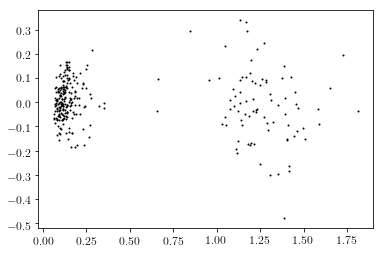

In [361]:
print(A.shape)

for k in range(len(pers)):
    plt.plot(B[:,k],color = "k",linewidth = .1)
plt.show()
for k in range(len(pers)):
    plt.plot(C[:,k],color = "k",linewidth = .1)
plt.show()

for k in ss.T:
    plt.plot(k,color = "k",linewidth = .1)
plt.show()
for k in mm.T:
    plt.plot(k,color = "k",linewidth = .1)
plt.show()

plt.plot(ss[-1],mm[-1],"o",color = "k",linewidth = .1,markersize = 1)
plt.show()

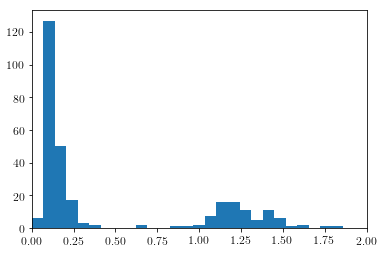

83
288


In [362]:
plt.hist(np.std(A[-1],axis = 0),np.linspace(0,2,30))
plt.xlim([0,2])
plt.show()

print(len([c for c in np.std(A[-1],axis = 0) if c > .5]))

print(len([c for c in np.std(A[-1],axis = 0)]))

In [363]:
144*1.5

216.0